#**ĐỒ ÁN CUỐI KÌ MÔN MÁY HỌC CS114.M11**
#NHẬN DIỆN BIỂN BÁO GIAO THÔNG CHO NGƯỜI ĐIỀU KHIỂN XE MÁY KHU VỰC QUẬN THÀNH PHỐ HỒ CHÍ MINH

## Giảng viên: 

*   Lê Đình Duy
*   Phạm Nguyễn Trường An

## Nhóm LHH
## Các thành viên thực hiện đồ án: 


*   Nguyễn Minh Lý (20521592)
*   Nguyễn Đặng Nhật Hào (20520490)
*   Nguyễn Hồng Hậu (20521300)






In [1]:
!nvidia-smi

Tue Feb  8 15:34:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Git clone source code and setup environment


In [ ]:
%cd /content/drive/MyDrive
!git clone https://github.com/AlexeyAB/darknet
%cd /content/drive/MyDrive/darknet

/content/drive/MyDrive
Cloning into 'darknet'...
remote: Enumerating objects: 15395, done.
remote: Total 15395 (delta 0), reused 0 (delta 0), pack-reused 15395
Receiving objects: 100% (15395/15395), 14.02 MiB | 8.03 MiB/s, done.
Resolving deltas: 100% (10352/10352), done.
Checking out files: 100% (2050/2050), done.
/content/drive/MyDrive/darknet


In [ ]:
# Tải data và giải nén
%cd /content/drive/MyDrive/darknet/data
!gdown --id 1_e3aQmsss2iEyHdQ3JeuTlB3KqiBb1I6
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/image--1321-_jpg.rf.e70c9ee0fb8ab473e5e882761a59a417.jpg  
  inflating: data/image--1321-_jpg.rf.e70c9ee0fb8ab473e5e882761a59a417.txt  
  inflating: data/image--1322-_jpg.rf.54019e98e14f6d73e29b82085ec9eb0d.jpg  
  inflating: data/image--1322-_jpg.rf.54019e98e14f6d73e29b82085ec9eb0d.txt  
  inflating: data/image--1322-_jpg.rf.9706e71c57ea380828b2f6d58aa83b96.jpg  
  inflating: data/image--1322-_jpg.rf.9706e71c57ea380828b2f6d58aa83b96.txt  
  inflating: data/image--1322-_jpg.rf.ded0306df5e50b90432c3f3e78c470d6.jpg  
  inflating: data/image--1322-_jpg.rf.ded0306df5e50b90432c3f3e78c470d6.txt  
  inflating: data/image--1323-_jpg.rf.0fe366ed5f73a524081389628d5b0d82.jpg  
  inflating: data/image--1323-_jpg.rf.0fe366ed5f73a524081389628d5b0d82.txt  
  inflating: data/image--1323-_jpg.rf.9a51c6b00702593ca47faac6cc9c62c9.jpg  
  inflating: data/image--1323-_jpg.rf.9a51c6b00702593ca47faac6cc9c62c9.txt  
  inflating: data/image--


* Tải file Makefile, train.txt, val.txt, yolo.names, yolo.data vào darknet/
* Tải file yolov4-custom.cfg vào darknet/config/


In [ ]:
# Download các file cấu hình cần thiết 
%cd /content/drive/MyDrive/darknet
!gdown --id 1yO2ajMC0HLvgOJhmERUJvej_-BJTnUXX #Download Makefile
!gdown --id 1Jv5TWVV9y-HHPow2zT21N_EfopJlNq-k #Download train.txt
!gdown --id 1QXZTjROSB1j96dVYGOSkqjPuJ7qB3cZd #Download val.txt
!gdown --id 1KWbTisVVTeauUXG7AymciVoC3m87M_5V #Download yolo.data
!gdown --id 1Os4su77B3WVpxdBD6zdH-k5A221ou25d #Download yolo.names

/content/drive/MyDrive/darknet
Downloading...
From: https://drive.google.com/uc?id=1yO2ajMC0HLvgOJhmERUJvej_-BJTnUXX
To: /content/drive/MyDrive/darknet/Makefile
100% 5.96k/5.96k [00:00<00:00, 12.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Jv5TWVV9y-HHPow2zT21N_EfopJlNq-k
To: /content/drive/MyDrive/darknet/train.txt
100% 225k/225k [00:00<00:00, 10.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QXZTjROSB1j96dVYGOSkqjPuJ7qB3cZd
To: /content/drive/MyDrive/darknet/val.txt
100% 7.33k/7.33k [00:00<00:00, 10.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1KWbTisVVTeauUXG7AymciVoC3m87M_5V
To: /content/drive/MyDrive/darknet/yolo.data
100% 72.0/72.0 [00:00<00:00, 145kB/s]
Downloading...
From: https://drive.google.com/uc?id=1Os4su77B3WVpxdBD6zdH-k5A221ou25d
To: /content/drive/MyDrive/darknet/yolo.names
100% 1.02k/1.02k [00:00<00:00, 2.01MB/s]


In [ ]:
%cd /content/drive/MyDrive/darknet/cfg
!rm yolov4-custom.cfg
!gdown --id 15PRrVqY6je4Hn6pJgWDxk2doQff4o8aU #Download file config

/content/drive/MyDrive/darknet/cfg
Downloading...
From: https://drive.google.com/uc?id=15PRrVqY6je4Hn6pJgWDxk2doQff4o8aU
To: /content/drive/MyDrive/darknet/cfg/yolov4-custom.cfg
100% 12.3k/12.3k [00:00<00:00, 23.1MB/s]


In [4]:
%cd /content/drive/MyDrive/darknet
!rm darknet
!make

/content/drive/MyDrive/darknet
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_o

# Train

In [ ]:
# Download pretrain yolov4.conv.137
%cd /content/drive/My\ Drive/darknet
!gdown --id 1JKF-bdIklxOOVy-2Cr5qdvjgGpmGfcbp

/content/drive/My Drive/darknet
Downloading...
From: https://drive.google.com/uc?id=1JKF-bdIklxOOVy-2Cr5qdvjgGpmGfcbp
To: /content/drive/MyDrive/darknet/yolov4.conv.137
100% 170M/170M [00:02<00:00, 74.5MB/s]


In [ ]:
%cd /content/drive/My\ Drive/darknet
!./darknet detector train yolo.data \
                          cfg/yolov4-custom.cfg \
                          yolov4.conv.137 \
                          -dont_show 

/content/drive/My Drive/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov4-custom
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 2, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.0

#Predict and evaluate

Download file weight team chúng em đã train trước về để predict

In [ ]:
!gdown --id 1cp9-SbA1RXZ4MAafwmeEXuG_-OT1T4f6 #Download best_v4_augmentdata.weights (Train trên tập tăng cường)
!gdown --id 1WL7vE-fHH7dRhTlsYoPhJVHeESsRMlJR #Download best_v4_sourcedata.weights (Train trên tập gốc)

Downloading...
From: https://drive.google.com/uc?id=1cp9-SbA1RXZ4MAafwmeEXuG_-OT1T4f6
To: /content/drive/MyDrive/darknet/best_v4_augmentdata.weights
100% 257M/257M [00:02<00:00, 125MB/s]
Downloading...
From: https://drive.google.com/uc?id=1WL7vE-fHH7dRhTlsYoPhJVHeESsRMlJR
To: /content/drive/MyDrive/darknet/best_v4_sourcedata.weights
100% 257M/257M [00:04<00:00, 55.7MB/s]


### Predict on image

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
%cd /content/drive/MyDrive/darknet/results
!gdown --id 1aaLT52kF9KzKEw2_ixWsXxYZ3ylu7PiM #Download image để test

/content/drive/MyDrive/darknet/results
Downloading...
From: https://drive.google.com/uc?id=1aaLT52kF9KzKEw2_ixWsXxYZ3ylu7PiM
To: /content/drive/MyDrive/darknet/results/603.jpg
100% 163k/163k [00:00<00:00, 10.2MB/s]


In [ ]:
%cd /content/drive/MyDrive/darknet
!./darknet detector test yolo.data \
                          cfg/yolov4-custom.cfg \
                          best_v4_sourcedata.weights \
                          results/603.jpg \
                          -dont_show

/content/drive/MyDrive/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv

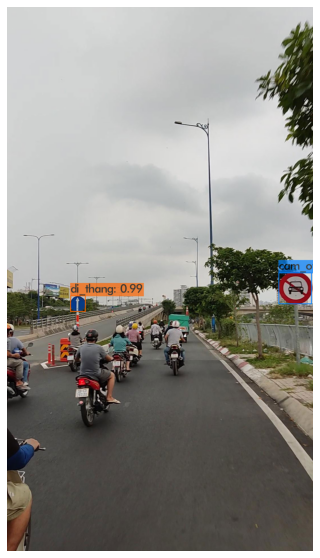

In [ ]:
imShow('/content/drive/MyDrive/darknet/predictions.jpg')

### Predict on video

In [3]:
%cd /content/drive/MyDrive/darknet/results
!gdown --id 1aFRaFyxqydKjgyBH3ko_Yrp1G4GqJ2nF #Download video để test

/content/drive/MyDrive/darknet/results
Downloading...
From: https://drive.google.com/uc?id=1aFRaFyxqydKjgyBH3ko_Yrp1G4GqJ2nF
To: /content/drive/MyDrive/darknet/results/1.mp4
100% 310M/310M [00:02<00:00, 154MB/s]


In [5]:
%cd /content/drive/MyDrive/darknet
!./darknet detector demo \
                    yolo.data \
                    cfg/yolov4-custom.cfg \
                    best_v4_sourcedata.weights \
                    -dont_show /content/drive/MyDrive/darknet/results/1.mp4 -i 0 \
                    -out_filename results/output.mp4

Streaming output truncated to the last 5000 lines.
 cvWriteFrame 
Objects:


FPS:12.1 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:


FPS:12.3 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:


FPS:12.5 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:


FPS:12.4 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:


FPS:12.5 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:


FPS:12.7 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:


FPS:12.8 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:


FPS:12.9 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:


FPS:13.0 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:


FPS:13.1 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:


FPS:13.1 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:


FPS:13.0 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:


FPS:12.9 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:


FPS:12.9 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:


FPS:12.8 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:


FPS:12.8 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:


FPS:12.9 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:


FPS:13.0 	 AVG_FPS:12.8

 cvWriteFrame 
Objects:


FPS:1

### Evaluate model

In [ ]:
# Đánh giá model train trên tập gốc
!./darknet detector map yolo.data \
                        cfg/yolov4-custom.cfg \
                        best_v4_sourcedata.weights

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x

In [ ]:
# Đánh giá model train trên tập tăng cường
!./darknet detector map yolo.data \
                        cfg/yolov4-custom.cfg \
                        best_v4_augmentdata.weights

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x